Wheeler Institute GIS workshop - Assignment

Submission Date 06/06/2023

-------------------------------------------------------------------------

NAME: [Martin, Sure Ondiwa]
EMAIL: [surekondiwa@gmail.com]
-------------------------------------------------------------------------


In [125]:
!pip install jupiter lab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement jupiter (from versions: none)
ERROR: No matching distribution found for jupiter


In [ ]:
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import  pandas as pd
import time, os
from pandas import DataFrame
import geopandas as gpd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint, LineString, MultiLineString
from shapely import wkt
from shapely.ops import nearest_points, snap
from shapely.ops import unary_union
from shapely.geometry import shape, Point
import fiona
import networkx as nx
import pyproj
from pyproj import CRS
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mainpath="/content/drive"
inpath=mainpath+"/MyDrive/GIS_Research_2023"
outpath=mainpath+"/https://drive.google.com/drive/folders/1gm4ghdAdDRJNV7i71jRikh0aZ7k56KAB?usp=drive_link/"

In [ ]:
dir_path='/content/drive/MyDrive/Geopandas_ass/data'

In [ ]:
# Defining Coordinate Reference System to use throughout the whole notebook
wgs84_crs = CRS.from_string('EPSG:4326') # WGS 1984
aeaa_crs = CRS.from_string("esri:102022") # albers equal area africa crs
aedc_crs = CRS.from_string("esri:102023") # Africa equidistant conic

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/dist-packages')

1.Tanzanian cities

In [ ]:
maindir = "/content/drive/MyDrive/shared with me/data/cleaned/"

In [ ]:
maindir= "https://drive.google.com/drive/folders/1NpCX2uBLugE62iQzzh2BC180cz1DmMO8"

In [ ]:
Cities_path = r'https://drive.google.com/file/d/1c1UdpdVoZf7ECP_tfuBbe87B9PX_zL9O/view?usp=drive_link.csv'

In [ ]:
df = pd.read_csv(Cities_path)

In [ ]:
df

,"<!DOCTYPE html><html><head><meta name=""google"" content=""notranslate""><meta http-equiv=""X-UA-Compatible"" content=""IE=edge;""><style nonce=""yRLc31S1azE_9KBUvh2QrQ"">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name=""referrer"" content=""origin""><title>citypop_v4_latlons.csv - Google 雲端硬碟</title><meta property=""og:title"" content=""citypop_v4_latlons.csv""><meta property=""og:type"" content=""article""><meta property=""og:site_name"" content=""Google Docs""><meta property=""og:url"" content=""https://drive.google.com/file/d/1c1UdpdVoZf7ECP_tfuBbe87B9PX_zL9O/view?usp=drive_link.csv&amp;usp=embed_facebook""><link rel=""shortcut icon"" href=""https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png""><link rel=""stylesheet"" href=""https://fonts.googleapis.com/css?family=Google+Sans_old:300",400,500,"700"" nonce=""yRLc31S1azE_9KBUvh2QrQ""><link rel=""stylesheet"" href=""https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.x7qCKQsjbdU.L.X.O/am=AAAE/d=0/rs=AO0039tIuc0Mb9YgPgi_Iwq3vQf6tE8c1Q"" nonce=""yRLc31S1azE_9KBUvh2QrQ""><script nonce=""5-HMlCR6uISW5IssEBFfDg"">_docs_flag_initialData={""docs-ails"":""docs_cold""","docs-fwds:""docs_sdf""","docs-crs:""docs_crs_nfd""",docs-fe-re:3,docs-fl:1,docs-l1lc:5,"docs-l1lm:""TPE""",...,0.86,0.87,0.88,0.89,1].11,[[null.2,null.209,null.210,"https://www.gstatic.com/og/_/js/k=og.qtm.en_US.XAh_2J9gHV0.es5.O/rt=j/m=qabr,q_dnp,qapid/exm=qaaw,qadd,qaid,qein,qhaw,qhba,qhbr,qhch,qhga,qhid,qhin/d=1/ed=1/rs=AA2YrTulQR-bnX81HtKxvwqVcn75q4m45w]]]]",};this.gbar_=this.gbar_||{};(function(_){var window=this;
0,try{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Copyright The Closure Library Authors.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPDX-License-Identifier: Apache-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,var Lj=function(a,b,c){_.le.log(46,{att:a,max:b,url:c})},Nj=function(a,b,c){_.le.log(47,{att:a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,}catch(e){_._DumpException(e)},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,})(this.gbar_);,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,// Google Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Load city extents shapefile
city_extents_gdf=gpd.read_file('city_extents.shp')

In [ ]:
#using geopandas to convert long and lat to points
df_geo = gpd.GeoDataFrame(df,geometry = gpd.points_from_xy(
    df.lon,df.lat))

In [ ]:
df_geo

In [ ]:
# Load built-in world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-65-44d69b5588d8>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<ipython-input-87-f40b03cb25c3>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

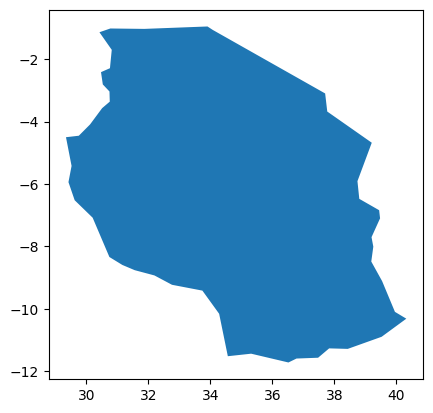

In [ ]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
tanzania = world_data[world_data['name'] == 'Tanzania']
tanzania.plot()

In [ ]:
import folium
import pandas as pd

In [ ]:
cities = pd.DataFrame({
    'City': ['Dar es Salaam', 'Dodoma', 'Arusha', 'Mwanza', 'Mbeya'],
    'Latitude': [-6.7924, -6.1630, -3.3869, -2.5146, -8.9093],
    'Longitude': [39.2083, 35.7516, 36.6822, 32.9088, 33.4526]
})

In [ ]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
tanzania = world.loc[world['name']=='Tanzania']

# Create a map centered on Tanzania
map_tanzania = folium.Map(location=[-6.3728253, 34.8924826], zoom_start=6)

# Add the cities to the map
for i, row in tanzania.iterrows():
    folium.Marker([row['geometry'].centroid.y, row['geometry'].centroid.x],
                  popup=row['name']).add_to(map_tanzania)

# Display the map
map_tanzania

<ipython-input-88-9d74d953894e>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
# Load Tanzania shapefile from Natural Earth Data
tanzania = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
tanzania = tanzania[tanzania.name == 'Tanzania']

<ipython-input-120-ecf02efd135f>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  tanzania = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
# Filtering for Tanzanian cities only
tanzania_cities = df.loc[df['country'] == 'Tanzania']

In [ ]:
# Plot on a map
ax = tanzania.plot(color='white', edgecolor='black')
tanzania_cities.plot(ax=ax, color='blue', markersize=5)

In [ ]:
#Filter extents to Tanzania only
tanzania_extents_gdf=city_extents_gdf[city_extents_gdf['COUNTRY']=='Tanzania']

In [ ]:
#Join city locations data with extents on city name
tanzania_extents_gdf=tanzania_extents_gdf.join(cities_df.set_index('City'),on='city_name')

In [ ]:
#Drop extents with no matching city
tanzania_city_extents_gdf.dropna(subset=['City'],inplace=True)

In [ ]:
#Export filtered extents to new shapefile
tanzania_extents_gdf.to_file('tanzania_city_extents.shp')

2. Computation of total light emitted by each city in 1992 and 2013

In [ ]:
import rasterio

In [ ]:
from rasterio import transform
with rasterio.open('tza_lights1992.tif') as src:
  tza_lights_1992=src.read(1)
  transform = src.transform

In [ ]:
with rasterio.open('tza_lights_2013.tif') as src:
  tza_lights_2013 = src.read(1)

In [ ]:
#Load the shapefile with city extents
cities=gdp.read_file('cities_shapefile.shp')

In [ ]:
#create a new column to store the total light emitted
for index,city in cities.iterrows():
  #Get the extent of the city
  xmin,ymin,xmax,ymax = city.geometry.bounds

scatterplots of population against night lights

In [ ]:
# Load the dataset
data = pd.read_tif('tza_lights_1992.tif' , 'tza_lights_2013.tif')

In [ ]:
# Create a scatter plot of population vs. night lights
plt.scatter(data['population'], data['nightlights'])

In [ ]:
# Add labels and title
plt.xlabel('Population')
plt.ylabel('Night Lights')
plt.title('Population vs. Night Lights Scatter Plot')

In [ ]:
# Show the plot
plt.show()

3. Identify Tanzania's primary city

In [ ]:
#Read in the CSV file containing city locations
citypop = pd.read_csv('citypop_v4_latlons.csv')

In [ ]:
#Read in the shapefile conyaining city extents
city_extents = gpd.read_file('city_extents.shp')

In [ ]:
#Join the citypop dataframe and the city_extents geodataframe on the "city" column
cities = citypop.merge(city_extents, on='City')

In [ ]:
#find the primary city(i.e, the city with the largest area)
primary_city=cities.loc[cities['Area_km2'].idxmax()]

In [ ]:
#set up the plot
fig,ax = plt.subplots(figsize=(10,10))

In [ ]:
#plot the city extents for all cities except the primary city
cities.loc[cities['City'] !=primary_city['City']].plot(ax=ax,color='blue',alpha=0.3)

In [ ]:
#plot the primary city's extent
cities.loc[cities['City']==primary_city['City']].plot(ax=ax,color='red',alpha=0.3)

4. Create a routable road network

In [ ]:
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import osmnx as ox

In [ ]:
import networkx as nx

In [ ]:
#Load data from file
G=ox.load_graphml('roads.shp')

In [ ]:
#create nodes from city points
nodes=gpd.read_file('cities.shp')
G.add_nodes_from(nodes.index)

In [ ]:
#create edges from roads
edges=gpd.read_file('roads.shp')
G.add_edges_from(edges.index)

In [ ]:
#create edges from city connectors 
connectors=gpd.read_file('connectors.shp')
for i, row in connectors.iterrows():
  G.add_edge(row['City_id'],row['road_id'])

4.2 Deal with connectivity issues

In [ ]:
def snap_points_to_modified_connectors(points_gdf, connectors_gdf):
    
    out = points_gdf.copy()
    
    for index, row in points_gdf.iterrows():
        
        tmp_gdf = connectors_gdf.copy()
        tmp_gdf['distance'] = tmp_gdf.distance(row['geometry'])
        closest_geom = list(tmp_gdf.sort_values('distance')['geometry'])[0]
        closest_pts = [Point(coords) for coords in closest_geom.coords]
        dists = [row['geometry'].distance(x) for x in closest_pts]
        minimum = min(dists)
        minimum_index = [i for i, j in enumerate(dists) if j == minimum][0]      
        out.loc[index, 'geometry'] = closest_pts[minimum_index]
        
    return out

4.3 Join roads and connectors


4.4 Examine connectivity

In [ ]:
# taken from here:
# https://www.reddit.com/r/gis/comments/b1ui7h/geopandas_how_to_make_a_graph_out_of_a/

def gdf_to_nx(gdf_network):
    # generate graph from GeoDataFrame of LineStrings
    net = nx.Graph()
    net.graph['crs'] = gdf_network.crs
    fields = list(gdf_network.columns)

    for index, row in gdf_network.iterrows():
        first = row.geometry.coords[0]
        last = row.geometry.coords[-1]

        data = [row[f] for f in fields]
        attributes = dict(zip(fields, data))
        net.add_edge(first, last, **attributes)

    return net